In [54]:
# Step1: Import Python libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step2: read Dataset
df = pd.read_csv('./local_data/titanic.csv')
print('done')

done


In [3]:
# What is the shape and look of my dataset
df.shape

(891, 12)

In [4]:
# What does it look like?
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
int_cols = df.select_dtypes(include='int64').columns
print(int_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')


In [33]:
float_cols = df.select_dtypes(include='float64').columns
print(float_cols)

Index(['Age', 'Fare'], dtype='object')


In [9]:
int_cols = df.select_dtypes(include='object').columns
print(int_cols)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [10]:
#find duplicate rows if any
duplicates = df.duplicated()
print(duplicates) #too many records to identify duplicates
df[df.duplicated(keep=False)] #let's only keep the dup values in separate df


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
#identifying rows with missing values
rows_with_missing_values = df[df.isna().any(axis=1)]
print(rows_with_missing_values)
print(rows_with_missing_values.shape) # we can't delete 708 records though.....what do we do.

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

In [12]:
null_vals = df.isnull().sum()
print(null_vals)
counts_cabin = df['Cabin'].value_counts()
print(counts_cabin)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64


In [13]:
#let's drop the problematic column
df.drop('Cabin', axis=1, inplace=True)

In [14]:
df.dtypes #verify Cabin is gone

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [15]:
print(all(np.where(df['PassengerId'] > 0, True, False))) # are all records in PassId integers?
is_string_column = df['Name'].apply(lambda x: isinstance(x, str)).all() #check all rows are strings in column
print(is_string_column)

True
True


In [30]:
def check_all_floats(df:object, column_name:str):
    '''
    Check if all values in a column are floats
    '''
    value = df[column_name].apply(lambda x: isinstance(x, float)).all()
    return value

print(check_all_floats(df, 'Age'))
print(check_all_floats(df, 'Fare'))

True
True


In [19]:
check_all_floats

<function __main__.check_all_floats()>

In [24]:
def good_morning(name:str) ->'str':
    '''
    This funtion enables us to pass a string variable to render a 
    string output with a common greeting as our output
    name: this is the UI name of the user
    date: the date from ....
    '''
    output = (f'Good morning Sir,', name)
    return output

var1 = 'Martin'
print('executing function 1')
a = good_morning(var1)
print(a)

executing function 1
('Good morning Sir,', 'Martin')


In [42]:
# Create a new blank list object first
float_list = []

# this is list of float columns in our pandas dataframe
float_cols
for i in float_cols:
    value = check_all_floats(df, i)
    float_list.append(value)
    
print('done')
float_list

done


[True, True]

In [41]:
var_list = [1,2,3,4,5]
var_list
for i in var_list:
    print(i)

1
2
3
4
5


In [43]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [49]:
#deal with outliers
def find_outliers_zscore(data:object, column:str) -> 'str':
    '''
    This function will allow you to identify outliers in a given column. The function requires two
    inputs: a pandas dataframe object and a column string
    '''
    
    #(value - mean)/std
    z_score = np.abs((data[column] - data[column].mean() / data[column].std()))
    outliers = data[(z_score<2)] # return anything that is outside of 2 stds of deviation ~ 95%
    return outliers
print('done')

done


In [50]:
# lets find the outliers for the Age column
# create a new variable that stores the output from the zscore function
age_outliers = find_outliers_zscore(df, 'Age')
print(type(age_outliers)) # a pd
print('this is the shape: ', age_outliers.shape)
print('this is the type: ', type(age_outliers))
print('this is the top 5: ', age_outliers.head(3))

<class 'pandas.core.frame.DataFrame'>
this is the shape:  (40, 11)
this is the type:  <class 'pandas.core.frame.DataFrame'>
this is the top 5:      PassengerId  Survived  Pclass                             Name     Sex  \
7             8         0       3   Palsson, Master. Gosta Leonard    male   
10           11         1       3  Sandstrom, Miss. Marguerite Rut  female   
16           17         0       3             Rice, Master. Eugene    male   

    Age  SibSp  Parch   Ticket    Fare Embarked  
7   2.0      3      1   349909  21.075        S  
10  4.0      1      1  PP 9549  16.700        S  
16  2.0      4      1   382652  29.125        Q  


<Axes: xlabel='Age'>

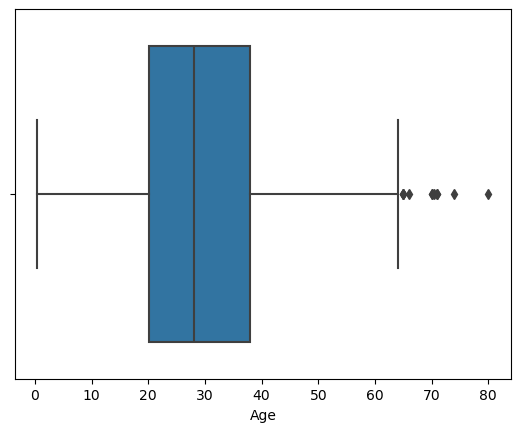

In [51]:
# Q1 25% Q2 50% Q3 75% Q4 100%.    Q3 - Q1
# let us visualize that indeed there are outliers in the dataset - column
sns.boxplot(x=df['Age'])

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

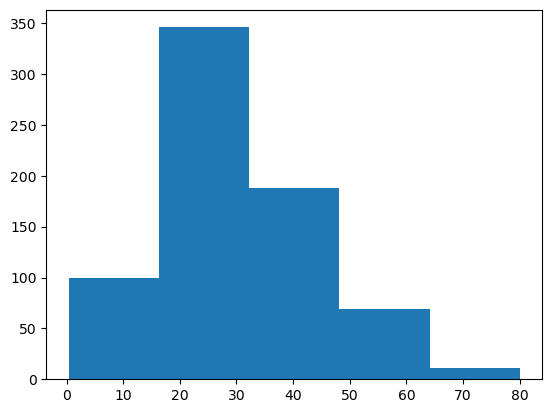

In [56]:
# seperate sanity check with a histogram
plt.hist(df['Age'], bins=5)

In [58]:
# replace original dataframe with a new dataset excluding outliers from the AGE column
# first create a function to exclude all outliers based on z-score
def exclude_outliers_zscore(data:object, column:str) -> 'str':
    '''
    This function will allow you to identify non-outliers in a given column. The function requires two
    inputs: a pandas dataframe object and a column string
    '''
    
    #(value - mean)/std
    z_score = np.abs((data[column] - data[column].mean() / data[column].std()))
    df_excl_outliers = data[(z_score>=2)] # return anything that is outside of 2 stds of deviation ~ 95%
    return df_excl_outliers
print('done')

df_excl_outliers = exclude_outliers_zscore(df, 'Age')
df_excl_outliers.shape

done


(674, 11)

In [59]:
df = df_excl_outliers
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [61]:
###################################
##### Step 4 Descriptive Stats ####
###################################
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,674.000000,674.000000,674.000000,674,674,674.000000,674.000000,674.000000,674,674.000000,672
unique,NaN,NaN,NaN,674,2,NaN,NaN,NaN,535,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,CA 2144,NaN,S
freq,NaN,NaN,NaN,1,430,NaN,NaN,NaN,5,NaN,523
mean,450.632047,0.390208,2.218101,NaN,NaN,31.327893,0.442136,0.375371,NaN,34.830149,NaN
std,257.886607,0.488159,0.845352,NaN,NaN,13.268181,0.834119,0.837486,NaN,53.962957,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,5.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,227.250000,0.000000,1.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,8.050000,NaN
50%,449.500000,0.000000,2.000000,NaN,NaN,29.000000,0.000000,0.000000,NaN,14.456250,NaN
75%,677.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,33.375000,NaN


In [62]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [63]:
df.info() # description of datatypes, counts, etc.

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  674 non-null    int64  
 1   Survived     674 non-null    int64  
 2   Pclass       674 non-null    int64  
 3   Name         674 non-null    object 
 4   Sex          674 non-null    object 
 5   Age          674 non-null    float64
 6   SibSp        674 non-null    int64  
 7   Parch        674 non-null    int64  
 8   Ticket       674 non-null    object 
 9   Fare         674 non-null    float64
 10  Embarked     672 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 63.2+ KB


In [64]:
# let's create a dummy df to analyze numeric columns in this dataset
df_numbers = df.drop(columns=['Name', 'Sex', 'Ticket', 'Embarked'], axis=1)
df_numbers.shape

(674, 7)

In [65]:
df_numbers

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
889,890,1,1,26.0,0,0,30.0000


In [66]:
# ANOVA analysis... 1st step is to create a group for analysis
grouped_data = df.groupby('Pclass')['Survived'].apply(list)
grouped_data

Pclass
1    [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, ...
2    [1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...
3    [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, ...
Name: Survived, dtype: object

In [67]:
# Now let us perform NOVA
import scipy.stats as stats
f_statistic, p_value=stats.f_oneway(*grouped_data)

print('this is our f-stat: ', f_statistic)
print('this is our p_value: ', p_value) #if probability is less than x<.05 then statistical significance between observed mean 

this is our f-stat:  56.40925424589362
this is our p_value:  2.2703899120278354e-23


In [ ]:
##################################### 
### Step 5 Data Visualizations ####
#####################################
